### Problem Statement:

You woke up today with a smile on your face, ready to take on the day. You have all these things to get done, and are thankful that you own a car in the city so you don't have to rely on the schedule of public transportation. You arrive at your car to find a little pink slip attached to your windshield; it's a parking ticket. You pull it out and take a look; your heart sinks. We've all been there. Getting a parking ticket is a sure-fire way to bring down your mood, and potentially your bank account balance.  

While there is no guaranteed approach to avoiding a parking ticket, other than not owning a car, we hope to be able to find trends that might decrease your chances of getting a parking ticket or having your fine dismissed if you do get one. Using data from Open Data DC on parking violations issued from july 2017 - july 2019 in DC, we want to develop a classification model that will predict the likelihood of having a ticket being liable or dismissed. We will gridsearch over machine learning algorithms such as KNN, Logistic Regression, and Support Vector Machines to develop the most robust model that optimizes predictive accuracy. We will also perform EDA on the categorical features  in the dataset to try and unearth trends that might reduce the chances of getting a parking ticket.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
citations_df = pd.read_csv('./Data/total.csv')

In [3]:
citations_df.head(2)

,objectid,issuing_agency_code,issuing_agency_name,issuing_agency_short,violation_code,violation_proc_desc,location,disposition_type,fine_amount,total_paid,xcoord,ycoord,latitude,longitude,year,month,date,day,hour,minute
0,60327097,80.0,AMTRAK,AMTRK,P170,FAILURE TO DISPLAY CURRENT TAGS,900 2ND ST NE,Dismissed,100.0,0,399661.0,137013.0,38.901,-77.004,2017,9,5,1,11,30
1,60345241,57.0,METRO POLICE,MTP,P039,PARK AT EXPIRED METER,1290 ALBAMA AVE SE,Liable - System,25.0,60,401049.0,130794.0,38.845,-76.988,2017,9,26,1,10,35


In [4]:
# splitting location on each word and creating new column
citations_df['loc_tokens'] = citations_df['location'].str.split()

In [5]:
citations_df.head(2)

,objectid,issuing_agency_code,issuing_agency_name,issuing_agency_short,violation_code,violation_proc_desc,location,disposition_type,fine_amount,total_paid,...,ycoord,latitude,longitude,year,month,date,day,hour,minute,loc_tokens
0,60327097,80.0,AMTRAK,AMTRK,P170,FAILURE TO DISPLAY CURRENT TAGS,900 2ND ST NE,Dismissed,100.0,0,...,137013.0,38.901,-77.004,2017,9,5,1,11,30,"[900, 2ND, ST, NE]"
1,60345241,57.0,METRO POLICE,MTP,P039,PARK AT EXPIRED METER,1290 ALBAMA AVE SE,Liable - System,25.0,60,...,130794.0,38.845,-76.988,2017,9,26,1,10,35,"[1290, ALBAMA, AVE, SE]"


Creating new columns for each quadrant (NE, NW, SE, SW)

In [6]:
citations_df['NE'] = [each.count('NE') for each in citations_df['loc_tokens']]

In [7]:
citations_df['NE'].value_counts()

0    2323280
1     346519
2          8
Name: NE, dtype: int64

In [8]:
citations_df[citations_df['NE'] == 2][['location', 'loc_tokens']]

,location,loc_tokens
1016,311 16TH ST NE (REAR) NE,"[311, 16TH, ST, NE, (REAR), NE]"
1325558,5300 BLAINE ST NE / 53RD ST NE,"[5300, BLAINE, ST, NE, /, 53RD, ST, NE]"
1325559,200 53RD ST NE / CLAY ST NE,"[200, 53RD, ST, NE, /, CLAY, ST, NE]"
1325560,200 53RD ST NE / CLAY ST NE,"[200, 53RD, ST, NE, /, CLAY, ST, NE]"
1325561,200 53RD ST NE / CLAY ST NE,"[200, 53RD, ST, NE, /, CLAY, ST, NE]"
2265024,BLOCK 1800 16TH ST NE @OKIE ST NE,"[BLOCK, 1800, 16TH, ST, NE, @OKIE, ST, NE]"
2427248,FRONT 200 ADAMS ST NE NA @3RD ST NE,"[FRONT, 200, ADAMS, ST, NE, NA, @3RD, ST, NE]"
2577702,3600 20TH ST NE / NEWTON ST NE,"[3600, 20TH, ST, NE, /, NEWTON, ST, NE]"


In [9]:
citations_df['NE'] = citations_df['NE'].map({0:0, 1:1, 2:1}).astype(int)

In [10]:
citations_df['NW'] = [each.count('NW') for each in citations_df['loc_tokens']]

In [11]:
citations_df['NW'].value_counts()

1    1893819
0     775932
2         56
Name: NW, dtype: int64

In [12]:
citations_df['NW'] = citations_df['NW'].map({0:0, 1:1, 2:1}).astype(int)

In [13]:
citations_df['SE'] = [each.count('SE') for each in citations_df['loc_tokens']]

In [14]:
citations_df['SE'].value_counts()

0    2410722
1     259079
2          6
Name: SE, dtype: int64

In [15]:
citations_df['SE'] = citations_df['SE'].map({0:0, 1:1, 2:1}).astype(int)

In [16]:
citations_df['SW'] = [each.count('SW') for each in citations_df['loc_tokens']]

In [17]:
citations_df['SW'].value_counts()

0    2509660
1     160147
Name: SW, dtype: int64

In [18]:
pd.set_option('display.max_columns', None)
citations_df.head(2)

,objectid,issuing_agency_code,issuing_agency_name,issuing_agency_short,violation_code,violation_proc_desc,location,disposition_type,fine_amount,total_paid,xcoord,ycoord,latitude,longitude,year,month,date,day,hour,minute,loc_tokens,NE,NW,SE,SW
0,60327097,80.0,AMTRAK,AMTRK,P170,FAILURE TO DISPLAY CURRENT TAGS,900 2ND ST NE,Dismissed,100.0,0,399661.0,137013.0,38.901,-77.004,2017,9,5,1,11,30,"[900, 2ND, ST, NE]",1,0,0,0
1,60345241,57.0,METRO POLICE,MTP,P039,PARK AT EXPIRED METER,1290 ALBAMA AVE SE,Liable - System,25.0,60,401049.0,130794.0,38.845,-76.988,2017,9,26,1,10,35,"[1290, ALBAMA, AVE, SE]",0,0,1,0


In [19]:
# Checking to see if any rows are not represented or represented more than once in new quadrant columns
citations_df[(citations_df['NE']+citations_df['NW']+citations_df['SE']+citations_df['SW']) != 1]

,objectid,issuing_agency_code,issuing_agency_name,issuing_agency_short,violation_code,violation_proc_desc,location,disposition_type,fine_amount,total_paid,xcoord,ycoord,latitude,longitude,year,month,date,day,hour,minute,loc_tokens,NE,NW,SE,SW
47,60588374,77.0,D.C. HOUSING AUTHORITY,DCHA,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,221 37TH PL,Other,250.0,500,404176.0,135410.0,38.887,-76.952,2017,9,12,1,8,51,"[221, 37TH, PL]",0,0,0,0
59,60622224,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,832 BARNABY ST,Liable - System,250.0,0,400658.0,129293.0,38.831,-76.992,2017,9,27,2,11,35,"[832, BARNABY, ST]",0,0,0,0
135,60683719,6.0,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,P013,PARK WITHIN 5 FEET OF DRIVEWAY OR ALLEY,4900 AYERS PL,Liable - System,20.0,0,405900.0,135701.0,38.889,-76.932,2017,9,10,6,4,0,"[4900, AYERS, PL]",0,0,0,0
566,60740730,21.0,MPD RESERVE CORPS,MPD-RC,P043,PARK TO REDUCE ROADWAY TO LESS THAN 10 FEET,9 LOGAN CIRCLE,Dismissed,25.0,0,397365.0,138033.0,38.910,-77.030,2017,9,24,6,9,15,"[9, LOGAN, CIRCLE]",0,0,0,0
793,60745581,2.0,METROPOLITAN POLICE DPT-DISTRICT 2,MPD-2D,P010,OBSTRUCTING CROSSWALK,5171 MAC ARTHUR BLVD,Other,50.0,50,391108.0,139849.0,38.926,-77.103,2017,9,19,1,11,23,"[5171, MAC, ARTHUR, BLVD]",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667094,77042351,15.0,DEPARTMENT OF PUBLIC WORKS,DPW,P002,STAND OR PARK IN ALLEY,REAR OF 1400 BLOCK CLIFTON ST NW*,Other,30.0,30,397324.0,139396.0,38.922,-77.031,2019,2,28,3,23,24,"[REAR, OF, 1400, BLOCK, CLIFTON, ST, NW*]",0,0,0,0
2667574,77048181,15.0,DEPARTMENT OF PUBLIC WORKS,DPW,P002,STAND OR PARK IN ALLEY,REAR OF 1400 BLOCK CLIFTON ST NW*,Liable - System,30.0,0,397324.0,139396.0,38.922,-77.031,2019,2,25,0,2,38,"[REAR, OF, 1400, BLOCK, CLIFTON, ST, NW*]",0,0,0,0
2668160,77055206,15.0,DEPARTMENT OF PUBLIC WORKS,DPW,P002,STAND OR PARK IN ALLEY,REAR OF 1400 BLOCK CLIFTON ST NW*,Other,30.0,30,397324.0,139396.0,38.922,-77.031,2019,2,23,5,0,4,"[REAR, OF, 1400, BLOCK, CLIFTON, ST, NW*]",0,0,0,0
2668769,77062030,15.0,DEPARTMENT OF PUBLIC WORKS,DPW,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,IN GARAGE OF 2323 SHERMAN AVE NW*,Other,250.0,0,397838.0,139245.0,38.921,-77.025,2019,2,27,2,9,33,"[IN, GARAGE, OF, 2323, SHERMAN, AVE, NW*]",0,0,0,0


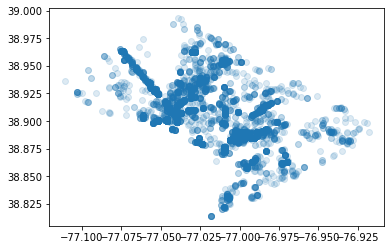

In [20]:
# Visualizing tickets with no quadrant data for any discernable trends
plt.scatter(x=citations_df[(citations_df['NE']+citations_df['NW']+citations_df['SE']+citations_df['SW']) != 1][['longitude',]],
           y=citations_df[(citations_df['NE']+citations_df['NW']+citations_df['SE']+citations_df['SW']) != 1][['latitude',]], alpha=.15);

In [21]:
# Dropping all rows in which there is no quadrant identifier - 10,174 rows
citations_df.drop(citations_df[(citations_df['NE']+citations_df['NW']+citations_df['SE']+citations_df['SW']) != 1].index, inplace=True)

In [22]:
# Dropping rows which have more than one quadrant identifier - 1 row
citations_df.drop(citations_df[(citations_df['NE']+citations_df['NW']+citations_df['SE']+citations_df['SW']) == 2].index, inplace=True)

**Diposition_type distributions**

In [23]:
citations_df['disposition_type'].value_counts()

Other               1761357
Liable - System      594062
Dismissed            160858
Liable               138160
Void                   2874
Continued              1483
Administrative          719
Liable - Traffic        119
Name: disposition_type, dtype: int64

##### Without a proper data dictionary, it is difficult to decipher what some of the classes in the disposition_type column mean. A request was made out to the open data dc offices for a data dictionary on this dataset; however, based on responses it doesn't seem they will be able to get one to us in time to complete this project by the due date.  

##### Therefore, we will attempt to perform some empirical analysis on the dispostion_type category to see if we can spot some trends that will help us in identifying the different classes such as 'other', 'void', 'continued', and 'administrative' in this dataset.  

##### If unsuccessful, we will be dropping all rows containing 'other', 'void', 'continued', and 'administrative' as their disposition_type, and grouping together the 'liable', 'liable_system', and 'liable - traffic' into one 'liable' class. We should then be left with only two classes in the dispostion_type column: 'liable' and 'dismissed'.

##### We understand that dropping a large amount of data from our dataset like this is likely to introduce some bias into our model that may affect the accuracy of any predicitons or inferences made from our model. However, given the scope and time constraints of this project, we feel it is necessary.

In [24]:
citations_df[citations_df['disposition_type'] == 'Continued'][['disposition_type','total_paid', 'fine_amount']]

,disposition_type,total_paid,fine_amount
3607,Continued,250,250.0
4697,Continued,50,50.0
16771,Continued,0,100.0
20043,Continued,100,100.0
21072,Continued,50,50.0
...,...,...,...
2662140,Continued,0,100.0
2663383,Continued,100,100.0
2665035,Continued,0,50.0
2666869,Continued,0,100.0


In [25]:
# 1,761,357 rows with disposition_type = 'other'
citations_df[citations_df['disposition_type'] == 'Other'][['disposition_type','total_paid', 'fine_amount']]

,disposition_type,total_paid,fine_amount
4,Other,25,25.0
5,Other,25,25.0
6,Other,25,25.0
10,Other,50,25.0
11,Other,30,30.0
...,...,...,...
2669799,Other,0,50.0
2669800,Other,0,100.0
2669801,Other,0,50.0
2669802,Other,25,25.0


In [26]:
# number of tix with disposition type 'other' whose total_paid amount is $0 - 322,301 rows
# we can infer that maybe due to some user/system error, these were 'dismissed' but not input as such
citations_df[(citations_df['disposition_type'] == 'Other')
             & (citations_df['total_paid'] == 0) ][['disposition_type','total_paid', 'fine_amount']]

,disposition_type,total_paid,fine_amount
376,Other,0,25.0
377,Other,0,50.0
378,Other,0,100.0
625,Other,0,250.0
731,Other,0,100.0
...,...,...,...
2669796,Other,0,50.0
2669797,Other,0,50.0
2669799,Other,0,50.0
2669800,Other,0,100.0


In [27]:
# number of tix with disposition type 'other' that have 
# paid less than the total fine_amount but more than $0 - 394 rows
# we can infer that maybe due to some user/system error, these were 'liable' but not input as such
# and probably had some late penalty fines tacked on to their original fine
citations_df[(citations_df['disposition_type'] == 'Other')
             & (citations_df['total_paid'] < citations_df['fine_amount'])
             & (citations_df['total_paid'] != 0)][['disposition_type','total_paid', 'fine_amount']]

,disposition_type,total_paid,fine_amount
1018,Other,5,65.0
3745,Other,231,250.0
5623,Other,42,100.0
12012,Other,78,100.0
32188,Other,50,100.0
...,...,...,...
2647167,Other,20,100.0
2648642,Other,50,100.0
2655522,Other,25,50.0
2660280,Other,60,100.0


In [28]:
# number of tix with disposition type 'other' that have paid the exact total fine_amount  - 1,209,583 rows
# we can infer that maybe due to some user/system error, these were 'liable' but not input as such
citations_df[(citations_df['disposition_type'] == 'Other')
             & (citations_df['total_paid'] == citations_df['fine_amount'])
             & (citations_df['total_paid'] != 0)][['disposition_type','total_paid', 'fine_amount']]

,disposition_type,total_paid,fine_amount
4,Other,25,25.0
5,Other,25,25.0
6,Other,25,25.0
11,Other,30,30.0
13,Other,30,30.0
...,...,...,...
2669785,Other,50,50.0
2669786,Other,50,50.0
2669798,Other,30,30.0
2669802,Other,25,25.0


In [29]:
# number of tix with disposition type 'other' that have
# paid more than the total fine_amount but more than $0 - 229,079 rows
# we can infer that maybe due to some user/system error, these were 'liable' but not input as such
# and probably paid extra for late penalty fines
citations_df[(citations_df['disposition_type'] == 'Other')
             & (citations_df['total_paid'] > citations_df['fine_amount'])
             & (citations_df['total_paid'] != 0)][['disposition_type','total_paid', 'fine_amount']]

,disposition_type,total_paid,fine_amount
10,Other,50,25.0
17,Other,60,30.0
24,Other,500,250.0
38,Other,200,100.0
53,Other,60,30.0
...,...,...,...
2669784,Other,100,50.0
2669787,Other,200,100.0
2669790,Other,60,30.0
2669793,Other,40,20.0


In [30]:
# number of tix that were 'dismissed' and paid $0 in fines - 158,637 rows
# this is less than the 160,858 total number of 'dismissed' rows
# this must mean some tickets that were 'dismissed' actually made a fine payment
citations_df[(citations_df['disposition_type'] == 'Dismissed')
             & (citations_df['total_paid'] == 0)][['disposition_type','total_paid', 'fine_amount']]

,disposition_type,total_paid,fine_amount
0,Dismissed,0,100.0
16,Dismissed,0,30.0
20,Dismissed,0,25.0
21,Dismissed,0,250.0
22,Dismissed,0,250.0
...,...,...,...
2669705,Dismissed,0,25.0
2669791,Dismissed,0,30.0
2669804,Dismissed,0,250.0
2669805,Dismissed,0,20.0


In [31]:
# number of tix that were dismissed but still made a payment toward fine amount - 2891 rows
citations_df[(citations_df['disposition_type'] == 'Dismissed')
            & (citations_df['total_paid'] != 0)][['disposition_type',
                                                        'total_paid',
                                                        'fine_amount']].sort_values(by='total_paid', ascending=False)

,disposition_type,total_paid,fine_amount
1539057,Dismissed,1000,1000.0
1910772,Dismissed,500,500.0
2302078,Dismissed,300,150.0
2180670,Dismissed,250,250.0
322083,Dismissed,250,250.0
...,...,...,...
2265186,Dismissed,5,5.0
2265046,Dismissed,5,5.0
2579050,Dismissed,5,5.0
2435512,Dismissed,5,5.0


2891 + 157,967 = 160,858 (total number 'dismissed')

In [32]:
# Dropping rows with disposition_type = 'other'
citations_df.drop(citations_df[citations_df['disposition_type'] == 'Other'].index, inplace=True)

# Dropping rows with disposition_type = 'void'
citations_df.drop(citations_df[citations_df['disposition_type'] == 'Void'].index, inplace=True)

# Dropping rows with disposition_type = 'continued'
citations_df.drop(citations_df[citations_df['disposition_type'] == 'Continued'].index, inplace=True)

# Dropping rows with disposition_type = 'administrative'
citations_df.drop(citations_df[citations_df['disposition_type'] == 'Administrative'].index, inplace=True)

In [33]:
# Unnecessary columns to drop -'issuing agency code', 'xcoord', 'ycoord', 'location'

citations_df.drop(columns=['issuing_agency_code', 'xcoord', 'ycoord', 'location'], inplace=True)

In [34]:
citations_df.head(1)

,objectid,issuing_agency_name,issuing_agency_short,violation_code,violation_proc_desc,disposition_type,fine_amount,total_paid,latitude,longitude,year,month,date,day,hour,minute,loc_tokens,NE,NW,SE,SW
0,60327097,AMTRAK,AMTRK,P170,FAILURE TO DISPLAY CURRENT TAGS,Dismissed,100.0,0,38.901,-77.004,2017,9,5,1,11,30,"[900, 2ND, ST, NE]",1,0,0,0


In [35]:
citations_df['disposition_type'].value_counts()

Liable - System     594062
Dismissed           160858
Liable              138160
Liable - Traffic       119
Name: disposition_type, dtype: int64

In [36]:
# Grouping all the different type of liables into one 'liable' class
citations_df['disposition_type'] = citations_df['disposition_type'].replace(
    ['Liable - System','Liable - Traffic'], 'Liable')

In [37]:
citations_df['disposition_type'].value_counts()

Liable       732341
Dismissed    160858
Name: disposition_type, dtype: int64

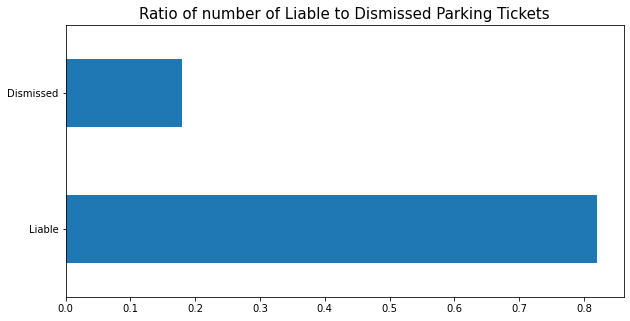

In [38]:
plt.figure(figsize=(10,5))
(citations_df['disposition_type'].value_counts(normalize=True)).plot(kind='barh')
plt.title('Ratio of number of Liable to Dismissed Parking Tickets', size=15);


only about 18% of tickets get dismissed, or about 1 in 5

In [39]:
citations_df.shape

(893199, 21)

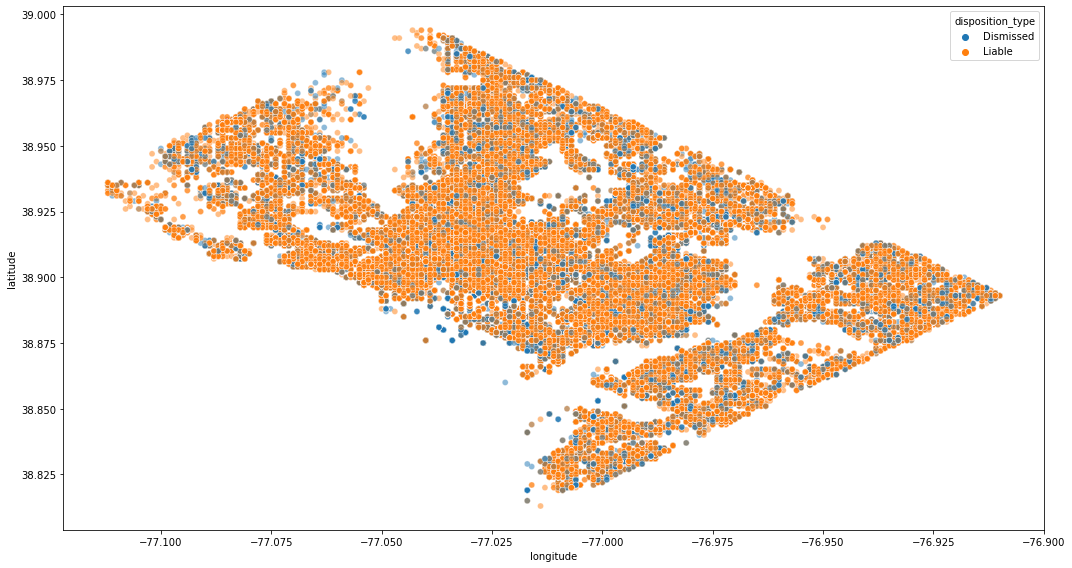

In [40]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(data=citations_df,
                x = 'longitude',
                y = 'latitude',
                hue = 'disposition_type',
#                 palette = 'copper_r',
                alpha = 0.5)
plt.tight_layout()

In [41]:
# fig = plt.figure(figsize=(15,8))
# alphas = np.linspace(0.1, .9)
# sns.scatterplot(data=citations_df,
#                 x = 'longitude',
#                 y = 'latitude',
#                 hue = 'disposition_type',
#                 alpha = alphas)
# plt.tight_layout()

# How to adjust alphas for individual classes in hue argument.???
# plt.figure(figsize=(15,8))
# # citations_df["alpha"] = np.where(citations_df.disposition_type == "Liable", 1.0, 0.1)

# ax = sns.scatterplot(x='longitude', y='latitude',
#                      data=citations_df[citations_df.alpha == 1.0], alpha=1.0)
# sns.scatterplot(x='longitude', y='latitude', data=citations_df[citations_df.alpha == 0.1], 
#                 alpha=0.1, ax=ax)

In [42]:
# Create new column 'quadrants' that contains quadrant names
# by kinda 'reverse one-hot encoding' the individual quadrant columns using .idxmax()
# source: https://stackoverflow.com/questions/38334296/reversing-one-hot-encoding-in-pandas
citations_df['quadrants'] = citations_df[['NE','NW','SE','SW']].idxmax(1)
citations_df.head(1)

,objectid,issuing_agency_name,issuing_agency_short,violation_code,violation_proc_desc,disposition_type,fine_amount,total_paid,latitude,longitude,year,month,date,day,hour,minute,loc_tokens,NE,NW,SE,SW,quadrants
0,60327097,AMTRAK,AMTRK,P170,FAILURE TO DISPLAY CURRENT TAGS,Dismissed,100.0,0,38.901,-77.004,2017,9,5,1,11,30,"[900, 2ND, ST, NE]",1,0,0,0,NE


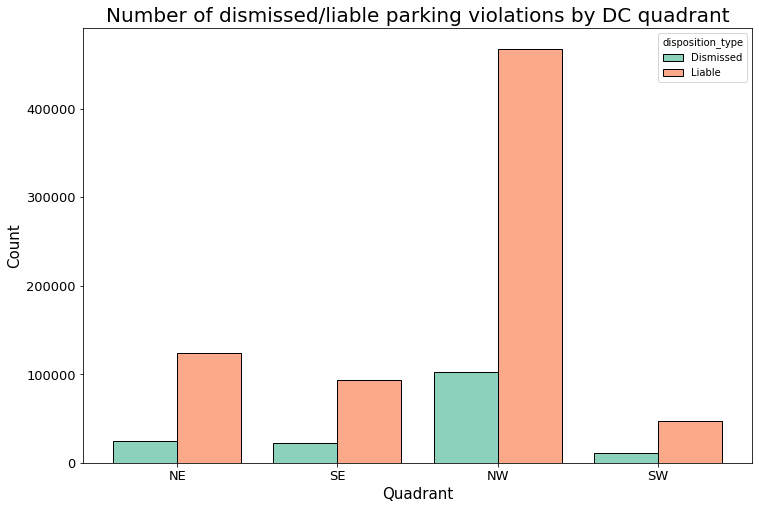

In [43]:

plt.figure(figsize=(12,8))
sns.histplot(data=citations_df, x='quadrants', hue='disposition_type', multiple='dodge', shrink=.8, palette='Set2')
plt.title('Number of dismissed/liable parking violations by DC quadrant', size=20)
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylabel('Count', size=15)
plt.xlabel('Quadrant', size=15);


In [44]:
citations_df.groupby(by='quadrants')['disposition_type'].value_counts(normalize=True)

quadrants  disposition_type
NE         Liable              0.833713
           Dismissed           0.166287
NW         Liable              0.819865
           Dismissed           0.180135
SE         Liable              0.810320
           Dismissed           0.189680
SW         Liable              0.804131
           Dismissed           0.195869
Name: disposition_type, dtype: float64

In [45]:
citations_df.groupby(by='quadrants')['disposition_type'].value_counts(normalize=True).to_frame()

disposition_type
quadrants disposition_type                  
NE        Liable                    0.833713
          Dismissed                 0.166287
NW        Liable                    0.819865
          Dismissed                 0.180135
SE        Liable                    0.810320
          Dismissed                 0.189680
SW        Liable                    0.804131
          Dismissed                 0.195869

Proportion of liable to dismissed parking citations per quadrant is pretty even. No significant differences.

In [46]:
citations_df['violation_proc_desc'].value_counts(ascending=False).head(30)

FAIL TO DISPLAY A MULTISPACE METER RECEIPT            111712
PARK AT EXPIRED METER                                  74941
FAILURE TO DISPLAY CURRENT TAGS                        73753
RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT       51640
DISOBEYING OFFICIAL SIGN                               50029
NO STOPPING OR STANDING IN PM RUSH HOUR ZONE           41180
NO PARKING STREET CLEANING                             39579
FAILURE TO SECURE DC TAGS                              38076
NO PARKING ANYTIME                                     32035
NO FRONT TAGS.                                         29676
NO STANDING ANYTIME                                    26972
FAIL TO DISPLAY CURRENT INSPECTION STICKER             26794
UNAUTHORIZED VEHICLE IN LOADING ZONE                   26095
VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CONSENT     21654
NO STOPPING OR STANDING IN AM RUSH HOUR ZONE           19915
PARKED WITHIN 25 FEET OF A STOP SIGN                   14763
PARK IN A BUS ZONE      

In [47]:
citations_df['issuing_agency_name'].value_counts(ascending=False)

DEPARTMENT OF PUBLIC WORKS             826629
METROPOLITAN POLICE DPT-DISTRICT 2      11009
METROPOLITAN POLICE DPT-DISTRICT 1       7337
METROPOLITAN POLICE DPT-DISTRICT 3       6430
METROPOLITAN POLICE DPT-DISTRICT 4       5939
METROPOLITAN POLICE DPT-DISTRICT 7       5003
METRO POLICE                             4808
DDOT                                     4379
METROPOLITAN POLICE DPT-DISTRICT 5       3980
METROPOLITAN POLICE DPT-DISTRICT 6       3478
D.C. HOUSING AUTHORITY                   3259
UNITED STATES PARK POLICE                2714
SPECIAL OPERATION DIV & TRAFFIC DIV      1848
UNITED STATES CAPITOL POLICE             1397
PROTECTIVE SERVICES DEPT (DC GOVT)       1135
US. SECRET SERVICE UNIFORM DIVISION       758
UNVRSTY OF THE D.C. SECURITY POLICE       406
FEDERAL PROTECTIVE SERVICES (US GV)       393
COMMAND INFORMATION CENTER                373
DPT. OF GENERAL SERVICES GUARDS           266
YOUTH DIVISION                            261
FBI                               

In [ ]:
# CAn do chart on unique police agencies in dc - include those that have issued more than 10 citations
# BOlling AFB, MLK Library, us bureau of engraving and printing,
#taxi commission, youth division, us govet printing office
# dc housing authority

In [53]:
citations_df[citations_df['issuing_agency_name'] == 'TAXI COMMISSION'].value_counts('disposition_type')

disposition_type
Liable       119
Dismissed     42
dtype: int64

In [60]:
citations_df.groupby(by='quadrants')
# [citations_df['issuing_agency_name'] == 'DEPARTMENT OF PUBLIC WORKS']
# .value_counts('violation_proc_desc')

KeyError: 'Columns not found: False, True'

In [49]:
####geopandas, shape file, try to find shape file for dc and use as regular dataframe